# Download data

To run this notebook you will need to download the GW data.

`python download_SXSwaveform_data.py`

# Getting Started

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import WDM

Here is an example GW waveform.

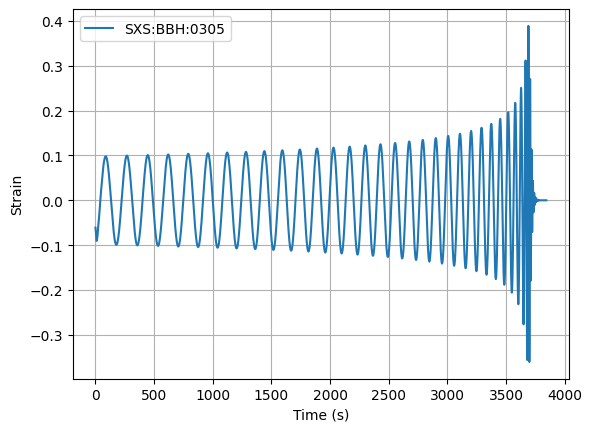

In [10]:
data = np.loadtxt("../data/waveform_SXS:BBH:0305_Reh22.txt")

time = data[0]
strain = data[1]

fig, ax = plt.subplots()
ax.plot(time, strain, label='SXS:BBH:0305')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Strain')
ax.legend()
ax.grid()
plt.show()

Let's look at the wavelet transform of this time series.

In [19]:
dt = np.mean(np.diff(time))

Nf = 128

N = WDM.code.utils.utils.next_multiple(len(time), 2*Nf)


In [ ]:
wdm = WDM.code.discrete_wavelet_transform.WDM.WDM_transform(dt=dt, Nf=Nf, N=N)

In [22]:
strain_padded, mask = wdm.pad_signal(strain)

In [24]:
w = wdm.forward_transform_truncated_fft(strain_padded)

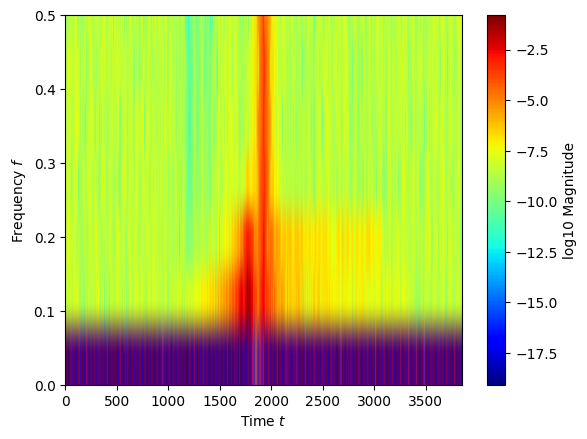

In [29]:
fig, ax = wdm.time_frequency_plot(w, part='abs', scale='log')
ax.set_ylim(0,0.5)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(time, strain, label='SXS:BBH:0305')
ax.plot(time, x_recovered, label='recovered')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Strain')
ax.legend()
ax.grid()
plt.show()